# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science 

## Lecture 1: Example part 2

**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner


In [13]:
import sys
import datetime
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from math import radians, cos, sin, asin, sqrt
from sklearn.linear_model import LinearRegression

sns.set(style="ticks")
%matplotlib inline

In [12]:
import os

HUBWAY_STATIONS_FILE = os.path.join('hubway_stations.csv')
HUBWAY_TRIPS_FILE = os.path.join('tripsthrough.csv')

In [14]:
hubway_data = pd.read_csv(HUBWAY_TRIPS_FILE, index_col=0, low_memory=False)
hubway_data.head()

,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
seq_id,,,,,,,,,,,,
1,8,Closed,9,2011-07-28 10:12:00,23.0,2011-07-28 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
2,9,Closed,220,2011-07-28 10:21:00,23.0,2011-07-28 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
3,10,Closed,56,2011-07-28 10:33:00,23.0,2011-07-28 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
4,11,Closed,64,2011-07-28 10:35:00,23.0,2011-07-28 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
5,12,Closed,12,2011-07-28 10:37:00,23.0,2011-07-28 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


# Кто использует велосипеды?
Уточнить в конкретные гипотезы:

- Больше мужчин или больше женщин?
- пожилые или молодые люди?
- Подписчики (постоянные пользователи) или одноразовые пользователи?


In [15]:
# Давайте сначала проведем некоторую очистку, удалив пустые ячейки или заменив их на NaN.
# Pandas может это сделать. 

hubway_data['gender'] = hubway_data['gender'].replace(np.nan, 'NaN', regex=True).values

# удалим  все значения в колонке 'birth_date'
hubway_data['birth_date'].dropna()
age_col = 2020.0 - hubway_data['birth_date'].values


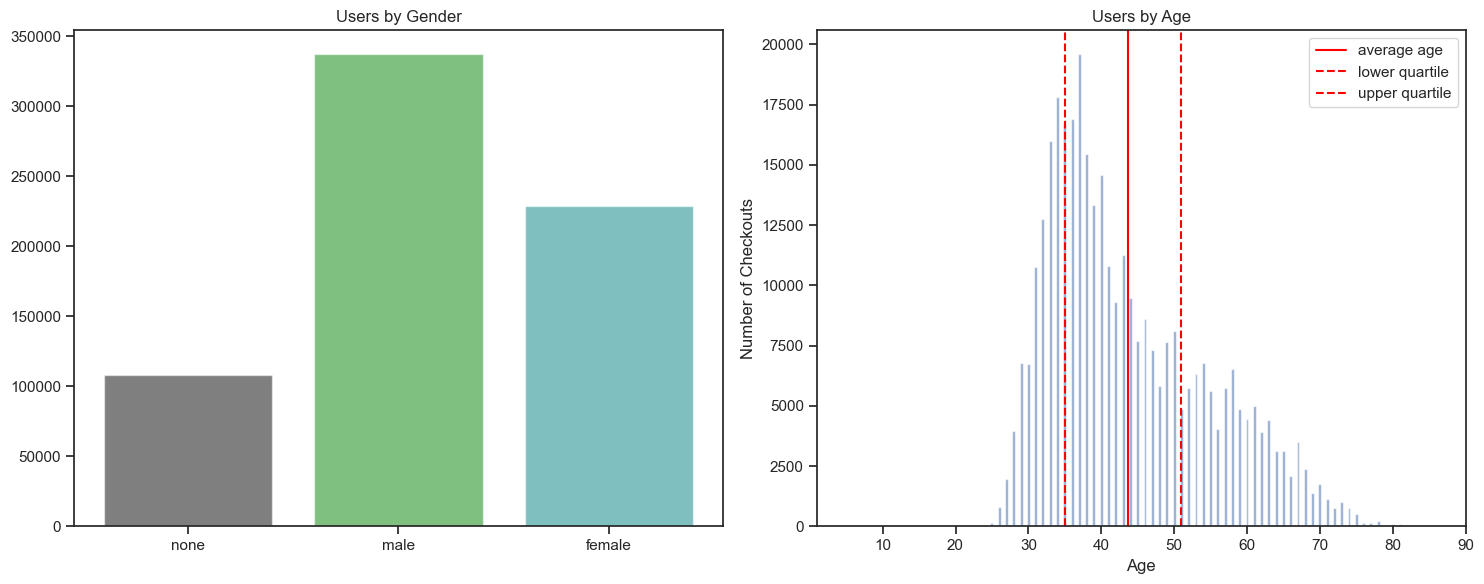

In [16]:

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

gender_counts = np.unique(hubway_data['gender'].values, return_counts=True)

ax[0].bar(range(3), gender_counts[1], align ='center', color =['black', 'green', 'teal'], alpha = 0.5)
ax[0].set_xticks([0, 1, 2])
ax[0].set_xticklabels(['none', 'male', 'female'])
ax[0].set_title('Users by Gender')

age_col = 2020.0 - hubway_data['birth_date'].dropna().values
age_counts = np.unique(age_col, return_counts = True)
ax[1].bar(age_counts[0], age_counts[1], align='center', width=0.4, alpha=0.6)
ax[1].axvline(x=np.mean(age_col), color='red', label='average age')
ax[1].axvline(x=np.percentile(age_col, 25), color ='red', linestyle='--', label ='lower quartile')
ax[1].axvline(x=np.percentile(age_col, 75), color ='red', linestyle='--', label ='upper quartile')
ax[1].set_xlim([1, 90])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Number of Checkouts')
ax[1].legend()
ax[1].set_title('Users by Age')

plt.tight_layout()
plt.savefig('who.png', dpi = 300)

#  Где проверяются велосипеды?
Уточнить в конкретные гипотезы:
1. Больше в Бостоне, чем Кембридж?
2. Больше в коммерческом или жилом?
3. Больше вокруг туристических достопримечательностей?



Параметр low_memory в функции read_csv() библиотеки Pandas определяет, используется ли стратегия чтения с низким использованием памяти для обработки больших CSV-файлов. 
Если параметр low_memory установлен в True, Pandas будет загружать данные по частям и использовать меньше оперативной памяти, чтобы обработать файл. 
Однако это может привести к потере точности при чтении числовых данных и привести к неожиданным результатам.

По умолчанию, параметр low_memory установлен в False. Это означает, что Pandas будет пытаться загрузить весь файл в память, что может привести к проблемам с памятью, если файл слишком большой. 

В данном коде параметр low_memory установлен в False, поэтому Pandas будет пытаться загрузить весь файл в память. Однако, поскольку файл HUBWAY_STATIONS_FILE не очень большой, это не должно быть проблемой.

In [17]:
# прочтем файл снова. с параметром low memory
station_data = pd.read_csv(HUBWAY_STATIONS_FILE, low_memory=False)[['id', 'lat', 'lng']]
station_data.head()

,id,lat,lng
0,3,42.340021,-71.100812
1,4,42.345392,-71.069616
2,5,42.341814,-71.090179
3,6,42.361285,-71.065140
4,7,42.353412,-71.044624


In [18]:
# Sometimes the data is given to you in pieces and must be merged!
# we want to combine the trips data with the station locations. pandas to the rescue... 
# прочтем файл снова. с параметром low memory
import os

HUBWAY_STATIONS_FILE = os.path.join('hubway_stations.csv')
HUBWAY_TRIPS_FILE = os.path.join('tripsthrough.csv')
hubway_data = pd.read_csv(HUBWAY_TRIPS_FILE, index_col=0, low_memory=False)
hubway_data.head()
station_data = pd.read_csv(HUBWAY_STATIONS_FILE, low_memory=False)[['id', 'lat', 'lng']]
station_data.head()
hubway_data_with_gps = hubway_data.join(station_data.set_index('id'), on='strt_statn')
hubway_data_with_gps.head()

,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender,lat,lng
seq_id,,,,,,,,,,,,,,
1,8,Closed,9,2011-07-28 10:12:00,23.0,2011-07-28 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male,42.359677,-71.059364
2,9,Closed,220,2011-07-28 10:21:00,23.0,2011-07-28 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male,42.359677,-71.059364
3,10,Closed,56,2011-07-28 10:33:00,23.0,2011-07-28 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male,42.359677,-71.059364
4,11,Closed,64,2011-07-28 10:35:00,23.0,2011-07-28 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female,42.359677,-71.059364
5,12,Closed,12,2011-07-28 10:37:00,23.0,2011-07-28 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female,42.359677,-71.059364


# <img style="width: 100%" alt="Heatmap" src="https://static.us.edusercontent.com/files/mRGDd7ddzN03xvXp4FZyKEc2">

OK - we cheated above and we skip some of the code which generated this plot. 

# Когда?Когда проверяются велосипеды?

Уточнить в конкретные гипотезы:
1. Больше в выходные, чем в будние дни?
2. Больше в час пик?
3. Больше летом, чем осень?


In [20]:
# Иногда функция, которую вы хотите исследовать, не существует в данных, и ее нужно разработать!


# чтобы найти время суток, мы воспользуемся столбцом start_date и вычтем часы. 
# мы используем list comprehension
# мы будем делать много таких операций
check_out_hours = hubway_data['start_date'].apply(lambda s: int(s[-8:-6]))

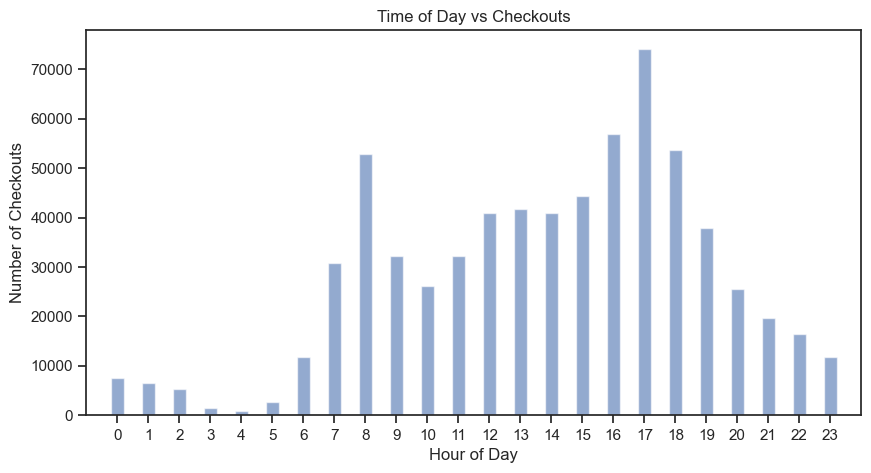

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

check_out_counts = np.unique(check_out_hours, return_counts=True)
ax.bar(check_out_counts[0], check_out_counts[1], align='center', width=0.4, alpha=0.6)
ax.set_xlim([-1, 24])
ax.set_xticks(range(24))
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Checkouts')
ax.set_title('Time of Day vs Checkouts')

plt.show()

# Why? For what reasons/activities are people checking out bikes?

Refine into specific hypotheses:

1. More bikes are used for recreation than commute?
2. More bikes are used for touristic purposes?
3. Bikes are use to bypass traffic?

Do we have the data to answer these questions with reasonable certainty?
What data do we need to collect in order to answer these questions?


# How? Questions that combine variables.

1. How does user demographics impact the duration the bikes are being used? Or where they are being checked out?
2. How does weather or traffic conditions impact bike usage?
3. How do the characteristics of the station location affect the number of bikes being checked out?

How questions are about modeling relationships between different variables.


In [21]:
# Here we define the distance from a point as a python function. 
# We set Boston city center long and lat to be the default value.
# you will become experts in building functions and using functions just like this 

def haversine(pt, lat2=42.355589, lon2=-71.060175):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lon1 = pt[0]
    lat1 = pt[1]
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 # Radius of earth in miles
    return c * r

In [22]:
# use only the checkouts that we have gps location 
station_counts = np.unique(hubway_data_with_gps['strt_statn'].dropna(), return_counts=True)
counts_df = pd.DataFrame({'id':station_counts[0], 'checkouts':station_counts[1]})
counts_df = counts_df.join(station_data.set_index('id'), on='id')
counts_df.head()

,id,checkouts,lat,lng
0,3.0,5122,42.340021,-71.100812
1,4.0,9586,42.345392,-71.069616
2,5.0,5856,42.341814,-71.090179
3,6.0,11143,42.361285,-71.065140
4,7.0,4625,42.353412,-71.044624


In [23]:
# add to the pandas dataframe the distance using the function we defined above and using map 
counts_df.loc[:, 'dist_to_center'] = list(map(haversine, counts_df[['lng', 'lat']].values))
counts_df.head()

,id,checkouts,lat,lng,dist_to_center
0,3.0,5122,42.340021,-71.100812,2.335706
1,4.0,9586,42.345392,-71.069616,0.853095
2,5.0,5856,42.341814,-71.090179,1.802423
3,6.0,11143,42.361285,-71.065140,0.467803
4,7.0,4625,42.353412,-71.044624,0.807582


In [24]:
# we will use sklearn to fit a linear regression model 
# we will learn a lot about modeling and using sklearn
reg_line = LinearRegression()
reg_line.fit(counts_df['dist_to_center'].values.reshape((len(counts_df['dist_to_center']), 1)), counts_df['checkouts'].values)

# use the fitted model to predict 
distances = np.linspace(counts_df['dist_to_center'].min(), counts_df['dist_to_center'].max(), 50)


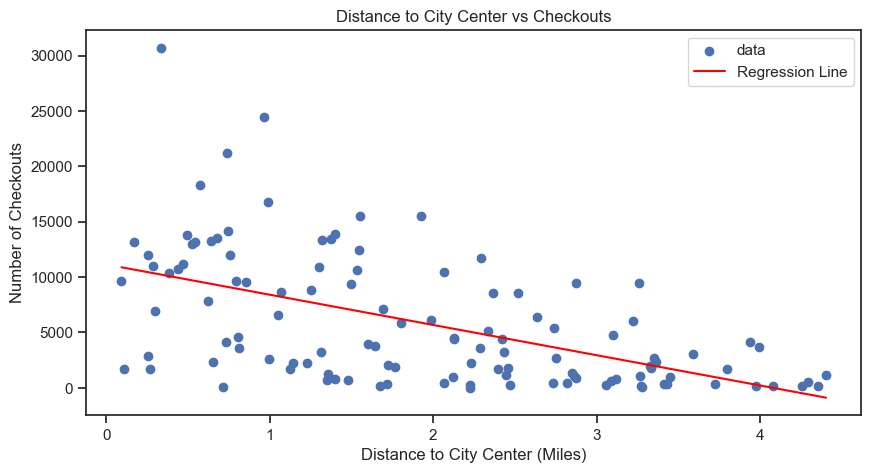

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(counts_df['dist_to_center'].values, counts_df['checkouts'].values, label='data')

ax.plot(distances, reg_line.predict(distances.reshape((len(distances), 1))), color='red', label='Regression Line')

ax.set_xlabel('Distance to City Center (Miles)')
ax.set_ylabel('Number of Checkouts')
ax.set_title('Distance to City Center vs Checkouts')
ax.legend()



# <font color='blue'> Notice all axis are labeled, we used legends and titles when necessary. Also notice we commented our code. </font>